In [1]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install imblearn
!pip install seaborn

# Importing Libraries

In [2]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy  as np
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataframe

In [3]:
train  = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\robi-datathon-2-pre-assessment\\train.csv",index_col=0)
test   = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\robi-datathon-2-pre-assessment\\test.csv",index_col=0)

# Checking Important Information

In [4]:
train.dtypes.value_counts()

object     14
float64    14
int64       7
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28322 entries, b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76be71PWA2ReUc4HUQn16Fya1z8_VStNnFGaXJF262CgsuMPzOaknSeg==' to b'gAAAAABinOiZ3mCQAtoJFXj-Ymjhi9FbbZ_Ypi5gDoAEYe1Cx66GhkhZ5UIJNLcPlgrRyfpabvIwD5ok1GxipWfkujjwXyMMBw=='
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  28322 non-null  object 
 1   s11     28322 non-null  object 
 2   s12     28322 non-null  object 
 3   s13     28322 non-null  int64  
 4   s16     28322 non-null  object 
 5   s17     28322 non-null  object 
 6   s18     28322 non-null  object 
 7   s48     28322 non-null  int64  
 8   s52     28322 non-null  object 
 9   s53     28322 non-null  object 
 10  s54     2628 non-null   object 
 11  s55     3206 non-null   object 
 12  s56     0 non-null      float64
 13  s57     0 non-null      float64
 14  s58     28322 non-null  object 
 15  s59     0 non-null      float64
 16  s69     28322 non-null  o

In [6]:
train.select_dtypes(include=['int64']).nunique()

s13       2
s48       2
n3       10
n12       2
n13       2
n15       7
label     2
dtype: int64

# Dropping Null and Less Significant Columns from Train Dataframe

In [7]:
train.drop("s13", axis=1,inplace=True)
train.drop("s53", axis=1, inplace=True)
train.drop("s54", axis=1, inplace=True)
train.drop("s55", axis=1, inplace=True)
train.drop("s56", axis=1, inplace=True)
train.drop("s57", axis=1, inplace=True)
train.drop("n12", axis=1, inplace=True)

In [8]:
train.drop("s59", axis=1, inplace=True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28322 entries, b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76be71PWA2ReUc4HUQn16Fya1z8_VStNnFGaXJF262CgsuMPzOaknSeg==' to b'gAAAAABinOiZ3mCQAtoJFXj-Ymjhi9FbbZ_Ypi5gDoAEYe1Cx66GhkhZ5UIJNLcPlgrRyfpabvIwD5ok1GxipWfkujjwXyMMBw=='
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  28322 non-null  object 
 1   s11     28322 non-null  object 
 2   s12     28322 non-null  object 
 3   s16     28322 non-null  object 
 4   s17     28322 non-null  object 
 5   s18     28322 non-null  object 
 6   s48     28322 non-null  int64  
 7   s52     28322 non-null  object 
 8   s58     28322 non-null  object 
 9   s69     28322 non-null  object 
 10  s70     28322 non-null  object 
 11  s71     28322 non-null  object 
 12  n1      28322 non-null  float64
 13  n2      28322 non-null  float64
 14  n3      28322 non-null  int64  
 15  n4      28322 non-null  float64
 16  n5      28322 non-null  f

# Data Describe and Co-relation Matrix

In [10]:
train.describe()

,s48,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n13,n14,n15,label
count,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000
mean,0.433338,10.201863,1.600111,4.805099,5.080537,-32.641183,0.015014,-9.107429,1.612428,5.232644,6.115109,1.699553,0.089506,0.497570,2.997740,0.168067
std,0.495545,4.414660,0.664985,2.199282,2.276162,0.241453,0.006550,0.205200,0.173560,2.179705,2.474138,0.115150,0.285478,0.289207,2.007611,0.373933
min,0.000000,2.200736,0.311727,0.000000,1.700370,-33.167589,0.000584,-9.517986,1.178469,2.508858,1.173465,1.500006,0.000000,0.000101,0.000000,0.000000
25%,0.000000,6.592127,1.013540,3.000000,2.833161,-32.862207,0.009195,-9.258473,1.489924,3.464229,4.414671,1.600056,0.000000,0.247801,1.000000,0.000000
50%,0.000000,9.535961,1.462197,5.000000,4.840320,-32.577026,0.016053,-9.174557,1.537263,4.461770,5.317154,1.698556,0.000000,0.495255,3.000000,0.000000
75%,1.000000,14.432580,2.194510,6.000000,7.300738,-32.396733,0.018771,-8.964786,1.730249,6.524341,7.027610,1.799238,0.000000,0.748786,5.000000,0.000000
max,1.000000,20.882733,3.137331,9.000000,8.594620,-32.289180,0.029992,-8.586583,2.173593,11.214870,12.029135,1.899995,1.000000,0.999990,6.000000,1.000000


In [11]:
corr_matrix = train.corr()
corr_matrix 

,s48,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n13,n14,n15,label
s48,1.000000,-0.031168,-0.033586,0.051126,-0.088057,0.007119,-0.116692,0.026812,-0.010002,0.092835,0.055772,0.000968,0.003117,0.005858,0.008473,0.248349
n1,-0.031168,1.000000,0.855794,0.289057,0.131877,0.166290,0.081274,0.602224,0.662666,0.393686,0.490394,-0.004650,0.010118,-0.002616,-0.006759,0.142913
n2,-0.033586,0.855794,1.000000,0.321529,0.154993,0.135346,0.026397,0.624320,0.648843,0.401184,0.525765,-0.006222,0.014115,-0.002258,-0.006553,0.120631
n3,0.051126,0.289057,0.321529,1.000000,0.222131,-0.056097,-0.425036,0.640050,0.220419,0.395780,0.604656,-0.000420,0.002704,-0.006510,-0.005514,-0.123280
n4,-0.088057,0.131877,0.154993,0.222131,1.000000,0.050772,-0.088265,0.223498,0.058810,0.168241,0.204752,-0.010558,0.007066,0.000621,-0.000099,-0.069697
n5,0.007119,0.166290,0.135346,-0.056097,0.050772,1.000000,0.426532,-0.093723,0.105349,0.124063,-0.160737,0.005097,0.001276,-0.014498,0.000468,0.183936
n6,-0.116692,0.081274,0.026397,-0.425036,-0.088265,0.426532,1.000000,-0.379512,0.077969,-0.145519,-0.455716,-0.001123,-0.001449,-0.007769,0.005207,0.168914
n7,0.026812,0.602224,0.624320,0.640050,0.223498,-0.093723,-0.379512,1.000000,0.500690,0.450283,0.781825,-0.002946,0.000887,0.003437,-0.007161,-0.033714
n8,-0.010002,0.662666,0.648843,0.220419,0.058810,0.105349,0.077969,0.500690,1.000000,0.289764,0.400302,-0.002946,0.005679,-0.001934,0.001868,0.168010
n9,0.092835,0.393686,0.401184,0.395780,0.168241,0.124063,-0.145519,0.450283,0.289764,1.000000,0.457136,-0.012473,0.008989,-0.008778,0.001764,0.042518


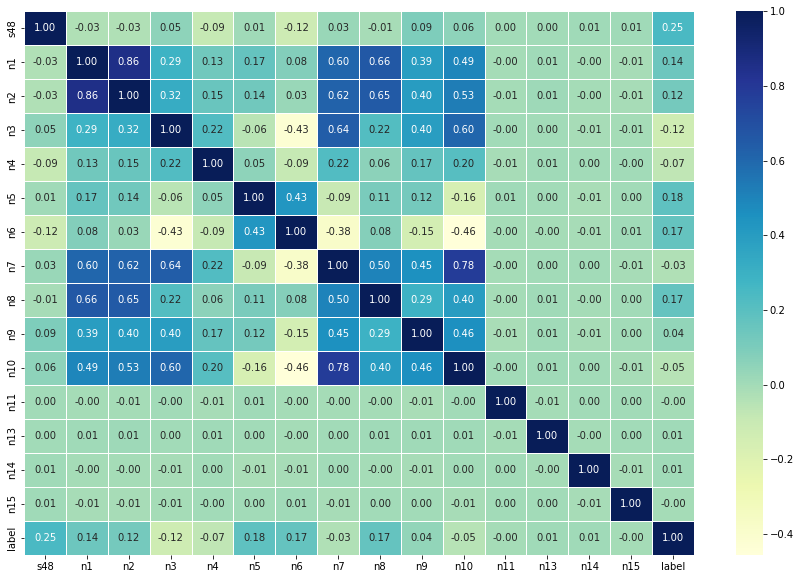

In [12]:
corr_matrix = train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [13]:
train.isnull().values.any()

False

# Separating Label

In [14]:
X = train.iloc[:,:-1]
y = train['label']

In [15]:
y.value_counts().to_frame().T

,0,1
label,23562,4760


# Encoding Catagorical Values of Train Dataframe

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [17]:
def label_encoding(df, columns):
    dictt = dict()
    le = preprocessing.LabelEncoder()
    for column in columns:
        df[column] = le.fit_transform(train[column])
        le_class = le.classes_
        le_trans = le.transform(le.classes_)
        for i in range(len(le_class)):
            dictt[le_class[i]] = le_trans[i]
    
    return df,dictt

In [18]:
X,label_dict = label_encoding(X, ['gender', 's11', 's12', 's16', 's17', 's18',
                                     's52', 's58', 's69', 's70', 's71'])

# Histogram

array([[<AxesSubplot:title={'center':'s48'}>,
        <AxesSubplot:title={'center':'n1'}>,
        <AxesSubplot:title={'center':'n2'}>,
        <AxesSubplot:title={'center':'n3'}>],
       [<AxesSubplot:title={'center':'n4'}>,
        <AxesSubplot:title={'center':'n5'}>,
        <AxesSubplot:title={'center':'n6'}>,
        <AxesSubplot:title={'center':'n7'}>],
       [<AxesSubplot:title={'center':'n8'}>,
        <AxesSubplot:title={'center':'n9'}>,
        <AxesSubplot:title={'center':'n10'}>,
        <AxesSubplot:title={'center':'n11'}>],
       [<AxesSubplot:title={'center':'n13'}>,
        <AxesSubplot:title={'center':'n14'}>,
        <AxesSubplot:title={'center':'n15'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

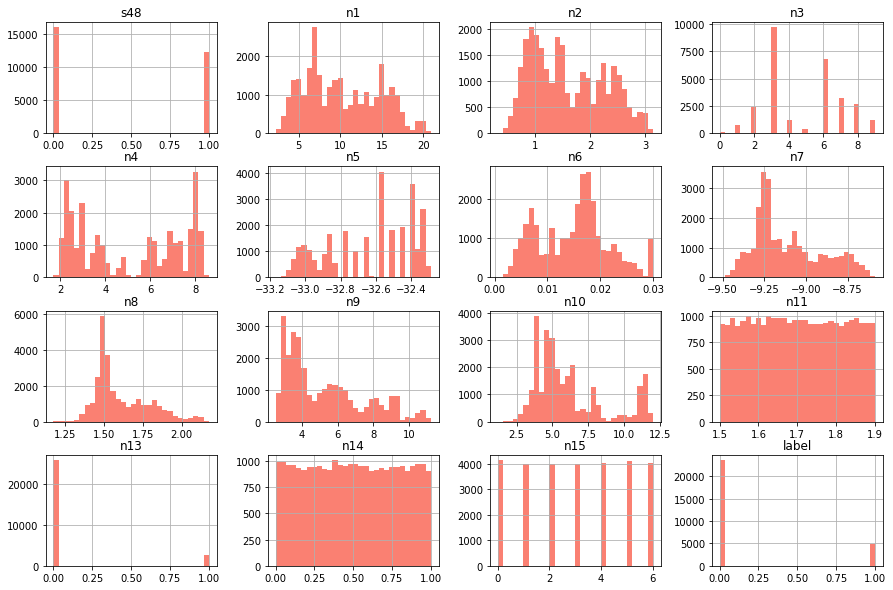

In [19]:
train.hist(bins=30, figsize=(15, 10), color=['salmon'])

# Use of Smote to Remove Biased

In [20]:
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

In [21]:
#sm = SMOTEENN(random_state=1)
#X_resampled, y_resampled = sm.fit_resample(X, y)

In [22]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [23]:
y_resampled.value_counts().to_frame().T

,0,1
label,23562,23562


# Dropping Null and Less Significant Columns from Test Dataframe

In [24]:
test.drop("s13", axis=1,inplace=True)
test.drop("s53", axis=1, inplace=True)
test.drop("s54", axis=1, inplace=True)
test.drop("s55", axis=1, inplace=True)
test.drop("s56", axis=1, inplace=True)
test.drop("s57", axis=1, inplace=True)
test.drop("n12", axis=1, inplace=True)
test.drop("s59", axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85065 entries, b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COxmIbpwlUAZ7GnDoMpAhQ_xGA87VuCUtSNnk-E_-PkolKMlmcNtPAzMA==' to b'gAAAAABinOiiLo4KNZVgClHgtOFRzEU9O97My6MowJFa4ybRyBq3uDzTJVKrJfS7DzU2nqAT06tveVEl23nycx348dbcJqdryA=='
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  85065 non-null  object 
 1   s11     85065 non-null  object 
 2   s12     85065 non-null  object 
 3   s16     85065 non-null  object 
 4   s17     85065 non-null  object 
 5   s18     85065 non-null  object 
 6   s48     85065 non-null  int64  
 7   s52     85065 non-null  object 
 8   s58     85065 non-null  object 
 9   s69     85065 non-null  object 
 10  s70     85065 non-null  object 
 11  s71     85065 non-null  object 
 12  n1      85065 non-null  float64
 13  n2      85065 non-null  float64
 14  n3      85065 non-null  int64  
 15  n4      85065 non-null  float64
 16  n5      85065 non-null  f

In [25]:
test.isnull().values.any()

False

# Encoding Catagorical Values of Test Dataframe

In [26]:
def label_encoding2(df, columns):
    dictt = dict()
    le = preprocessing.LabelEncoder()
    for column in columns:
        df[column] = le.fit_transform(test[column])
        le_class = le.classes_
        le_trans = le.transform(le.classes_)
        for i in range(len(le_class)):
            dictt[le_class[i]] = le_trans[i]
    
    return df,dictt

In [27]:
test,label_dict = label_encoding2(test, ['gender', 's11', 's12', 's16', 's17', 's18',
                                     's52', 's58', 's69', 's70', 's71'])

# Train data split into 80:20 ratio for Train and Validation

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, 
                                                  train_size=0.8,
                                                  test_size=0.2, 
                                                  random_state=42, 
                                                  shuffle=True)

# Use of Min-Max scaler to normalize

In [29]:
#from sklearn.preprocessing import MinMaxScaler
#scaler  = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_val   = scaler.transform(X_val)
#test    = scaler.transform(test)
cols_to_norm = ['n1', 'n2', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n14']
X_train[cols_to_norm] = X_train[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
cols_to_norm = ['n1', 'n2', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n14']
X_val[cols_to_norm] = X_val[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
cols_to_norm = ['n1', 'n2', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n14']
test[cols_to_norm] = test[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Model for Tabular classification with neural networks

In [30]:
model = keras.Sequential(
    [
        keras.layers.Dense(units=9, activation="relu", input_shape=(X_train.shape[-1],) ),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(units=9, activation="relu"),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

initial_weights = model.get_weights()

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 243       
                                                                 
 dropout (Dropout)           (None, 9)                 0         
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________


In [32]:
learning_rate = 0.001

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
              loss="binary_crossentropy", 
              metrics=keras.metrics.AUC()
             )

In [33]:
history = model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=1000, 
          validation_data=(X_val, y_val),
          verbose=0)

# Loss and ROC AUC Curve

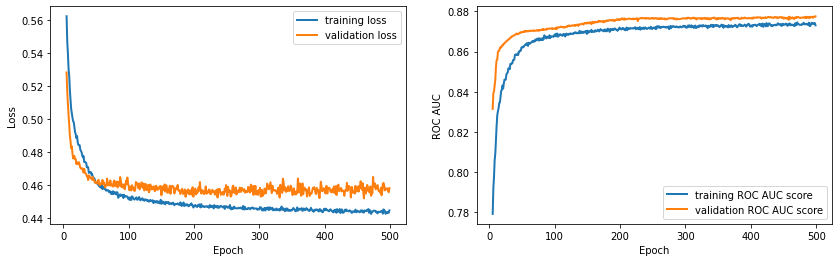

In [34]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

# Earlystopping Function

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.0002, 
    patience  = 20,    
    restore_best_weights=True,
)

In [36]:
model.set_weights(initial_weights)

In [37]:
history = model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=1000, 
          validation_data=(X_val, y_val),
          verbose=0,
          callbacks=[early_stopping]
        )

# New Loss and ROC AUC Curve

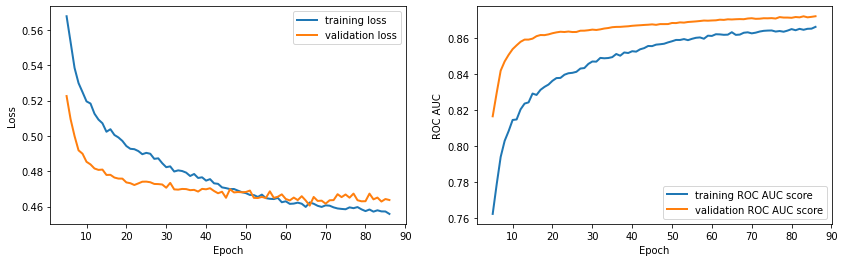

In [38]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

# Predicted Result

In [39]:
predicted_label = model.predict(test)
print(predicted_label)

[[0.88884246]
 [0.75805855]
 [0.8306867 ]
 ...
 [0.7458895 ]
 [0.896681  ]
 [0.41597965]]


In [40]:
predicted_label.dtype

dtype('float32')

# Predicted Result from Array to Float

In [41]:
plist= list(predicted_label)
plist

[array([0.88884246], dtype=float32),
 array([0.75805855], dtype=float32),
 array([0.8306867], dtype=float32),
 array([0.259064], dtype=float32),
 array([0.43700442], dtype=float32),
 array([0.19896993], dtype=float32),
 array([0.81613976], dtype=float32),
 array([0.28337523], dtype=float32),
 array([0.7291645], dtype=float32),
 array([0.8783765], dtype=float32),
 array([0.78093773], dtype=float32),
 array([0.39708063], dtype=float32),
 array([0.9571863], dtype=float32),
 array([0.12598172], dtype=float32),
 array([0.4852211], dtype=float32),
 array([0.55391455], dtype=float32),
 array([0.61742383], dtype=float32),
 array([0.7848714], dtype=float32),
 array([0.21648148], dtype=float32),
 array([0.24711749], dtype=float32),
 array([0.7514496], dtype=float32),
 array([0.69891536], dtype=float32),
 array([0.15977046], dtype=float32),
 array([0.3509747], dtype=float32),
 array([0.8761024], dtype=float32),
 array([0.5401482], dtype=float32),
 array([0.19775712], dtype=float32),
 array([0.229

In [42]:
p=[]
for i in range(len(predicted_label)):
    p.append(float(predicted_label[i]))

In [43]:
p

[0.8888424634933472,
 0.7580585479736328,
 0.8306866884231567,
 0.2590639889240265,
 0.437004417181015,
 0.19896993041038513,
 0.8161397576332092,
 0.28337523341178894,
 0.7291644811630249,
 0.8783764839172363,
 0.7809377312660217,
 0.3970806300640106,
 0.9571862816810608,
 0.12598171830177307,
 0.48522108793258667,
 0.5539145469665527,
 0.6174238324165344,
 0.7848713994026184,
 0.21648147702217102,
 0.24711748957633972,
 0.7514495849609375,
 0.6989153623580933,
 0.15977045893669128,
 0.3509747087955475,
 0.8761023879051208,
 0.5401481986045837,
 0.19775712490081787,
 0.22957119345664978,
 0.6822906732559204,
 0.8009898066520691,
 0.2420797348022461,
 0.8530954122543335,
 0.33452367782592773,
 0.23903819918632507,
 0.21107611060142517,
 0.9540975093841553,
 0.2491241693496704,
 0.8348110318183899,
 0.728287398815155,
 0.14824873208999634,
 0.23494771122932434,
 0.43192946910858154,
 0.24294504523277283,
 0.7875679731369019,
 0.705655038356781,
 0.17306971549987793,
 0.8336849212646484,

# Getting Label for Predicted Result

In [44]:
p1=[]
for i in range(len(p)):
    if (p[i]>0.5):
        p1.append(1)
    elif (p[i]<0.5):
        p1.append(0)
p1        

[1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,


# Print on a CSV File

In [45]:
test_df= pd.read_csv("C:\\Users\\LENOVO\\Desktop\\robi-datathon-2-pre-assessment\\test.csv")

In [46]:
my_submission = pd.DataFrame({'id': test_df.id, 'label': p1})
my_submission.to_csv('submission.csv', index=False)

# Result's value count

In [47]:
result= pd.read_csv("C:\\Users\\LENOVO\\Desktop\\robi-datathon-2-pre-assessment\\submission.csv")

In [48]:
result.label.value_counts() #.779

0    44173
1    40892
Name: label, dtype: int64